### Data Cleaning 

In [1]:
# 1. Import libraries & load dataset

import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("fintech_loans.csv")

# View structure
print(df.shape)
df.head()

(100000, 25)


,customer_id,loan_id,issue_date,term_months,loan_amount,interest_rate,monthly_emi,income,employment_type,credit_score,...,previous_defaults,overdue_days,status,payments_made,recovery_amount,collection_attempts,loan_age_months,emi_to_income_ratio,risk_score,risk_category
0,1000000,5000000,2020-05-10,36,45015,14.34,1545.95,21235.0,Salaried,583.0,...,0,17,Default,4,17585,5,66,0.873624,70.899471,Low
1,1000001,5000001,2021-07-18,24,50670,8.38,2300.46,99294.0,Salaried,606.0,...,0,9,Default,1,21910,6,52,0.278018,74.250441,Low
2,1000002,5000002,2021-02-04,48,53847,10.62,1381.79,58246.0,Salaried,645.0,...,0,10,Default,7,26695,6,57,0.284680,78.306878,Low
3,1000003,5000003,2020-12-31,24,90598,14.46,4369.58,47245.0,Salaried,630.0,...,0,12,Default,7,27332,2,58,1.109852,75.485009,Low
4,1000004,5000004,2022-06-27,24,111319,12.58,5270.37,147276.0,Salaried,601.0,...,0,17,Default,13,46850,6,40,0.429428,73.544974,Low


In [2]:
# 2. Basic data overview

df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   customer_id          100000 non-null  int64  
 1   loan_id              100000 non-null  int64  
 2   issue_date           100000 non-null  object 
 3   term_months          100000 non-null  int64  
 4   loan_amount          100000 non-null  int64  
 5   interest_rate        100000 non-null  float64
 6   monthly_emi          100000 non-null  float64
 7   income               99000 non-null   float64
 8   employment_type      100000 non-null  object 
 9   credit_score         99000 non-null   float64
 10  age                  100000 non-null  int64  
 11  gender               100000 non-null  object 
 12  city                 100000 non-null  object 
 13  state                100000 non-null  object 
 14  num_of_loans         100000 non-null  int64  
 15  previous_defaults 

customer_id               0
loan_id                   0
issue_date                0
term_months               0
loan_amount               0
interest_rate             0
monthly_emi               0
income                 1000
employment_type           0
credit_score           1000
age                       0
gender                    0
city                      0
state                     0
num_of_loans              0
previous_defaults         0
overdue_days              0
status                    0
payments_made             0
recovery_amount           0
collection_attempts       0
loan_age_months           0
emi_to_income_ratio       0
risk_score                0
risk_category             0
dtype: int64

In [3]:
# 3. Handle missing values

# Numeric columns
num_cols = ["income", "credit_score"]

# Fill missing values with median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# If any categorical missing:
cat_cols = df.select_dtypes(include="object").columns

# Filling missing values with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [4]:
# 4. Fix incorrect data formats (dates)

df["issue_date"] = pd.to_datetime(df["issue_date"], errors="coerce")

In [5]:
# 5. Remove duplicates

df.drop_duplicates(inplace=True)

In [6]:
df.head()

,customer_id,loan_id,issue_date,term_months,loan_amount,interest_rate,monthly_emi,income,employment_type,credit_score,...,previous_defaults,overdue_days,status,payments_made,recovery_amount,collection_attempts,loan_age_months,emi_to_income_ratio,risk_score,risk_category
0,1000000,5000000,2020-05-10,36,45015,14.34,1545.95,21235.0,Salaried,583.0,...,0,17,Default,4,17585,5,66,0.873624,70.899471,Low
1,1000001,5000001,2021-07-18,24,50670,8.38,2300.46,99294.0,Salaried,606.0,...,0,9,Default,1,21910,6,52,0.278018,74.250441,Low
2,1000002,5000002,2021-02-04,48,53847,10.62,1381.79,58246.0,Salaried,645.0,...,0,10,Default,7,26695,6,57,0.284680,78.306878,Low
3,1000003,5000003,2020-12-31,24,90598,14.46,4369.58,47245.0,Salaried,630.0,...,0,12,Default,7,27332,2,58,1.109852,75.485009,Low
4,1000004,5000004,2022-06-27,24,111319,12.58,5270.37,147276.0,Salaried,601.0,...,0,17,Default,13,46850,6,40,0.429428,73.544974,Low


In [7]:
# 6. Feature Engineering

# 6.1 Loan age in days
current_date = pd.Timestamp.today()
df["loan_age_days"] = (current_date - df["issue_date"]).dt.days

# 6.2 Risk Buckets from Credit Score
def credit_bucket(score):
    if score >= 750:
        return "Low Risk"
    elif score >= 600:
        return "Medium Risk"
    else:
        return "High Risk"

df["credit_bucket"] = df["credit_score"].apply(credit_bucket)

# 6.3 Default Flags (PAR30, PAR60, PAR90)
df["par_30"] = (df["overdue_days"] >= 30).astype(int)
df["par_60"] = (df["overdue_days"] >= 60).astype(int)
df["par_90"] = (df["overdue_days"] >= 90).astype(int)

# 6.4 Affordability Score
df["affordability_score"] = (df["income"] / df["monthly_emi"]).round(2)

# 6.5 Total Payable Amount
df["total_payable"] = df["monthly_emi"] * df["term_months"]

# 6.6 Remaining Balance
df["remaining_balance"] = df["total_payable"] - df["recovery_amount"]

In [8]:
df.head()

,customer_id,loan_id,issue_date,term_months,loan_amount,interest_rate,monthly_emi,income,employment_type,credit_score,...,risk_score,risk_category,loan_age_days,credit_bucket,par_30,par_60,par_90,affordability_score,total_payable,remaining_balance
0,1000000,5000000,2020-05-10,36,45015,14.34,1545.95,21235.0,Salaried,583.0,...,70.899471,Low,2027,High Risk,0,0,0,13.74,55654.20,38069.20
1,1000001,5000001,2021-07-18,24,50670,8.38,2300.46,99294.0,Salaried,606.0,...,74.250441,Low,1593,Medium Risk,0,0,0,43.16,55211.04,33301.04
2,1000002,5000002,2021-02-04,48,53847,10.62,1381.79,58246.0,Salaried,645.0,...,78.306878,Low,1757,Medium Risk,0,0,0,42.15,66325.92,39630.92
3,1000003,5000003,2020-12-31,24,90598,14.46,4369.58,47245.0,Salaried,630.0,...,75.485009,Low,1792,Medium Risk,0,0,0,10.81,104869.92,77537.92
4,1000004,5000004,2022-06-27,24,111319,12.58,5270.37,147276.0,Salaried,601.0,...,73.544974,Low,1249,Medium Risk,0,0,0,27.94,126488.88,79638.88


In [9]:
df.columns

Index(['customer_id', 'loan_id', 'issue_date', 'term_months', 'loan_amount',
       'interest_rate', 'monthly_emi', 'income', 'employment_type',
       'credit_score', 'age', 'gender', 'city', 'state', 'num_of_loans',
       'previous_defaults', 'overdue_days', 'status', 'payments_made',
       'recovery_amount', 'collection_attempts', 'loan_age_months',
       'emi_to_income_ratio', 'risk_score', 'risk_category', 'loan_age_days',
       'credit_bucket', 'par_30', 'par_60', 'par_90', 'affordability_score',
       'total_payable', 'remaining_balance'],
      dtype='object')

In [10]:
loans = df[['loan_id', 'customer_id', 'issue_date', 'loan_amount', 'monthly_emi', 'term_months', 'payments_made',
        'status', 'overdue_days', 'recovery_amount', 'collection_attempts', 'income', 'credit_score', 'city', 'state', 
        'employment_type', 'age', 'gender', 'previous_defaults', 'num_of_loans', 'loan_age_months', 'emi_to_income_ratio',
        'risk_category', 'interest_rate']]

In [11]:
loans.head()

,loan_id,customer_id,issue_date,loan_amount,monthly_emi,term_months,payments_made,status,overdue_days,recovery_amount,...,state,employment_type,age,gender,previous_defaults,num_of_loans,loan_age_months,emi_to_income_ratio,risk_category,interest_rate
0,5000000,1000000,2020-05-10,45015,1545.95,36,4,Default,17,17585,...,Telangana,Salaried,31,M,0,1,66,0.873624,Low,14.34
1,5000001,1000001,2021-07-18,50670,2300.46,24,1,Default,9,21910,...,Delhi,Salaried,48,M,0,1,52,0.278018,Low,8.38
2,5000002,1000002,2021-02-04,53847,1381.79,48,7,Default,10,26695,...,Telangana,Salaried,53,M,0,1,57,0.284680,Low,10.62
3,5000003,1000003,2020-12-31,90598,4369.58,24,7,Default,12,27332,...,Karnataka,Salaried,58,M,0,0,58,1.109852,Low,14.46
4,5000004,1000004,2022-06-27,111319,5270.37,24,13,Default,17,46850,...,Karnataka,Salaried,39,O,0,0,40,0.429428,Low,12.58


In [13]:
loans.to_csv('fintech_loans_cleaned.csv', index=False)

### EDA 

#### 1. UNIVARIATE ANALYSIS 

In [20]:
# A) Target Variable — Default vs Current

df['status'].value_counts(normalize=True) * 100

Default    83.847
Current    16.153
Name: status, dtype: float64

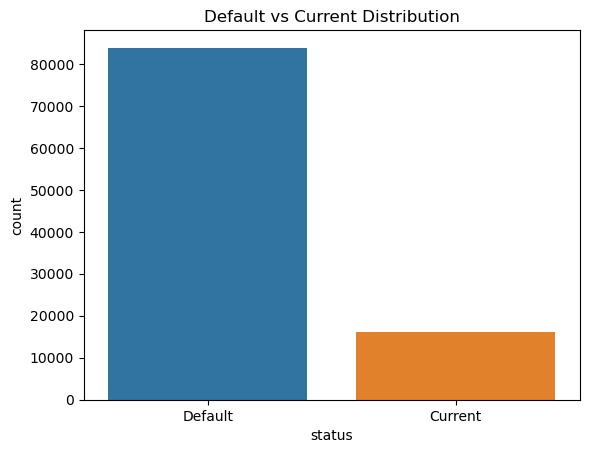

In [21]:
# Plot it
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='status')
plt.title("Default vs Current Distribution")
plt.show()

- The portfolio is extremely high-risk, with 83.85% of loans in Default and only 16.15% currently active.

In [22]:
# B) Numeric Columns

# List numeric columns:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols].describe()

,customer_id,loan_id,term_months,loan_amount,interest_rate,monthly_emi,income,credit_score,age,num_of_loans,...,payments_made,recovery_amount,collection_attempts,loan_age_months,emi_to_income_ratio,risk_score,loan_age_days,affordability_score,total_payable,remaining_balance
count,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.050000e+06,5.050000e+06,25.536840,50963.603740,12.027347,2970.499147,58575.443500,649.36178,42.438500,0.594830,...,10.387080,19675.458640,3.362900,47.303540,1.068259,75.019402,1458.587030,49.392638,58388.943880,38713.485240
std,2.886766e+04,2.886766e+04,11.967003,28297.201776,2.608835,2602.743218,32898.234429,69.33103,12.714234,0.773701,...,10.950761,16261.160354,2.353253,27.506606,1.764516,11.869504,825.159082,87.381680,33197.010957,27368.355602
min,1.000000e+06,5.000000e+06,6.000000,5000.000000,6.000000,117.430000,8000.000000,362.00000,21.000000,0.000000,...,0.000000,250.000000,0.000000,0.000000,0.007305,0.000000,26.000000,0.360000,5087.880000,87.880000
25%,1.025000e+06,5.025000e+06,12.000000,29917.750000,10.230000,1286.935000,34502.500000,603.00000,31.000000,0.000000,...,3.000000,7351.750000,1.000000,24.000000,0.255644,71.075838,745.000000,10.870000,33682.230000,16719.770000
50%,1.050000e+06,5.050000e+06,24.000000,50030.000000,12.010000,2303.875000,57017.500000,649.00000,42.000000,0.000000,...,6.000000,15608.000000,3.000000,47.000000,0.521142,76.895944,1459.000000,23.040000,56776.800000,36606.720000
75%,1.074999e+06,5.074999e+06,36.000000,70329.000000,13.800000,3800.795000,79443.000000,696.00000,53.000000,1.000000,...,13.000000,27369.250000,5.000000,71.000000,1.107567,82.186949,2173.000000,46.910000,80556.075000,56145.110000
max,1.099999e+06,5.099999e+06,48.000000,178948.000000,25.000000,29616.320000,265619.000000,850.00000,64.000000,6.000000,...,48.000000,167962.000000,7.000000,95.000000,33.144720,100.000000,2886.000000,1642.610000,248859.360000,212320.160000


In [23]:
print(num_cols)

Index(['customer_id', 'loan_id', 'term_months', 'loan_amount', 'interest_rate',
       'monthly_emi', 'income', 'credit_score', 'age', 'num_of_loans',
       'previous_defaults', 'overdue_days', 'payments_made', 'recovery_amount',
       'collection_attempts', 'loan_age_months', 'emi_to_income_ratio',
       'risk_score', 'loan_age_days', 'affordability_score', 'total_payable',
       'remaining_balance'],
      dtype='object')


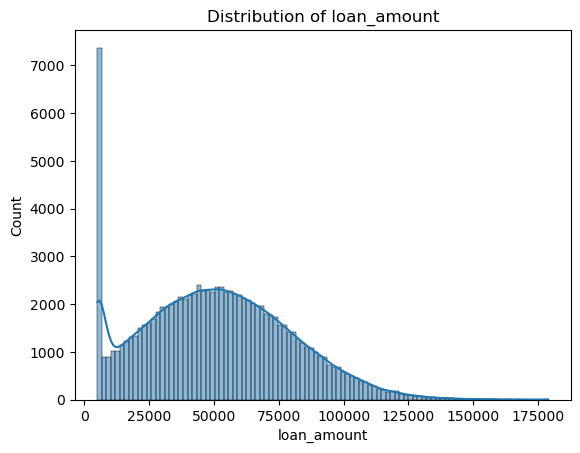

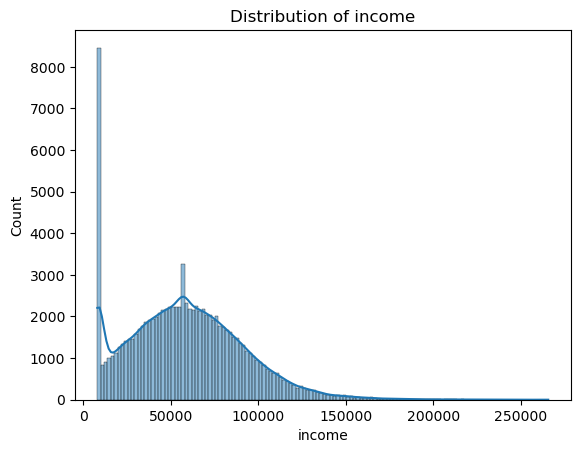

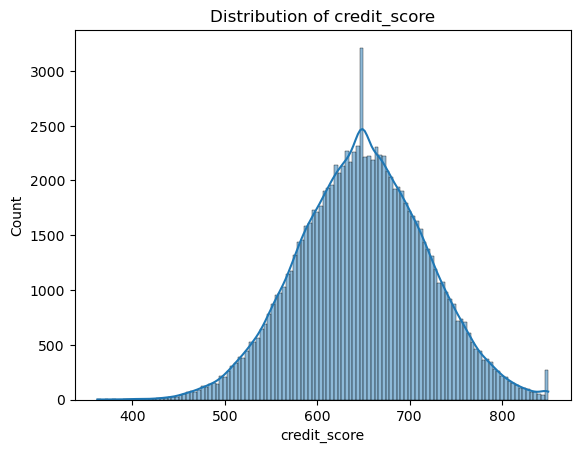

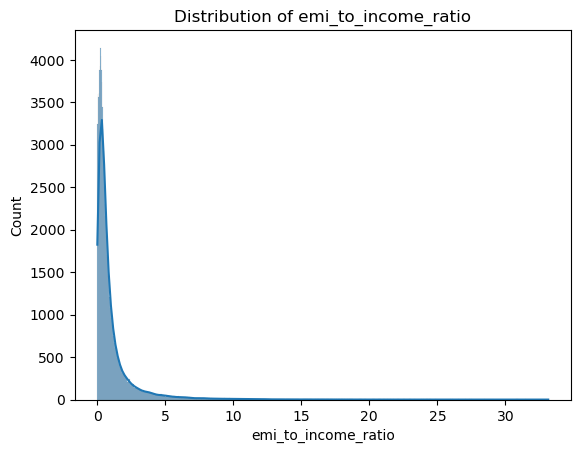

In [24]:
# Distribution plots (use for income, credit_score, emi_to_income_ratio, loan_amount)
for col in ['loan_amount','income','credit_score','emi_to_income_ratio']:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [26]:
# C) Categorical Columns

cat_cols = df.select_dtypes(exclude=['float64', 'int64']).columns
print(cat_cols)

Index(['issue_date', 'employment_type', 'gender', 'city', 'state', 'status',
       'risk_category', 'credit_bucket', 'par_30', 'par_60', 'par_90'],
      dtype='object')


Salaried         60051
Self-Employed    30037
Business          9912
Name: employment_type, dtype: int64


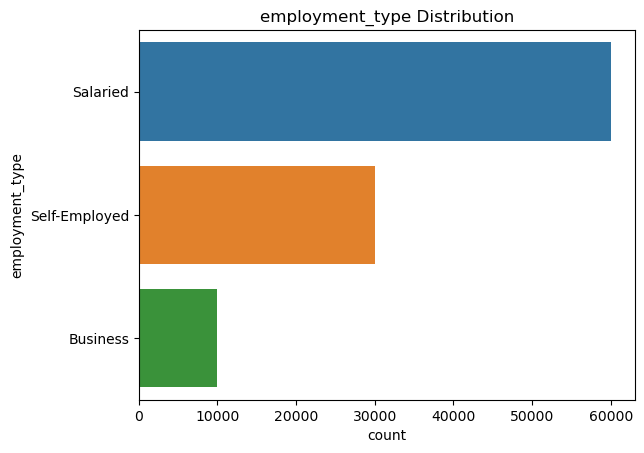

M    71994
F    26955
O     1051
Name: gender, dtype: int64


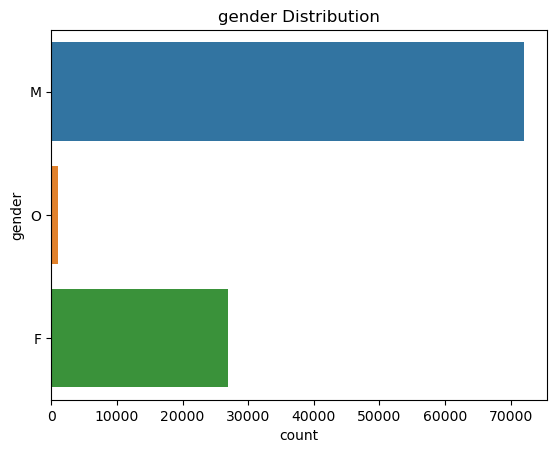

Maharashtra      23015
Karnataka        17968
Delhi            15998
Telangana        10007
Tamil Nadu        7941
West Bengal       7001
Gujarat           6076
Uttar Pradesh     6070
Rajasthan         5924
Name: state, dtype: int64


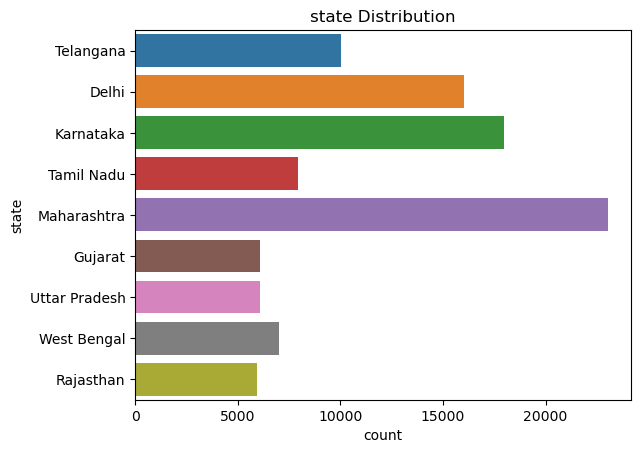

Low       91591
Medium     8001
High        408
Name: risk_category, dtype: int64


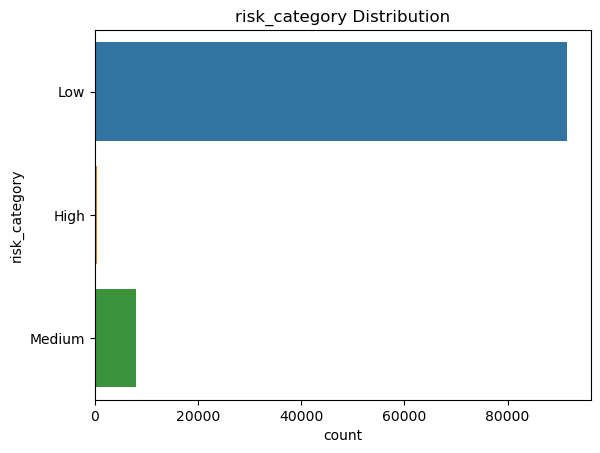

Medium Risk    68877
High Risk      23613
Low Risk        7510
Name: credit_bucket, dtype: int64


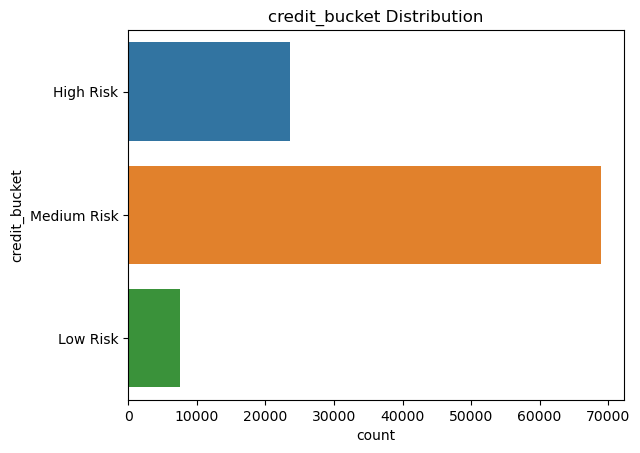

In [27]:
cat_cols = ['employment_type','gender','state','risk_category', 'credit_bucket']
for col in cat_cols:
    print(df[col].value_counts())
    sns.countplot(y=df[col])
    plt.title(f"{col} Distribution")
    plt.show()

#### 2. BIVARIATE ANALYSIS (EDA focused on predicting default)

<Axes: xlabel='status', ylabel='loan_amount'>

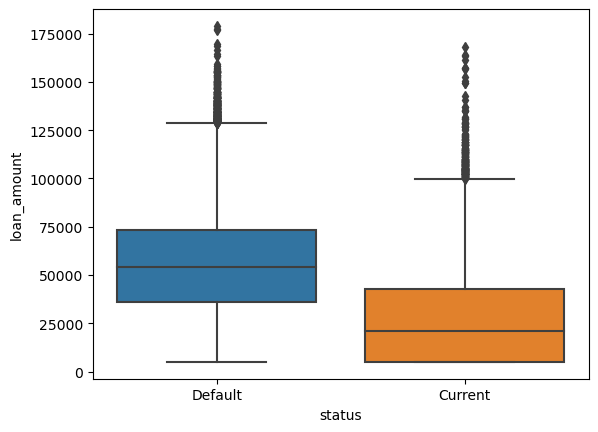

In [28]:
# 1. Loan Amount vs Default
sns.boxplot(data=df, x='status', y='loan_amount')

**Insight template:**
- Defaulters show higher average loan amount compared to non-defaulters.

<Axes: xlabel='status', ylabel='emi_to_income_ratio'>

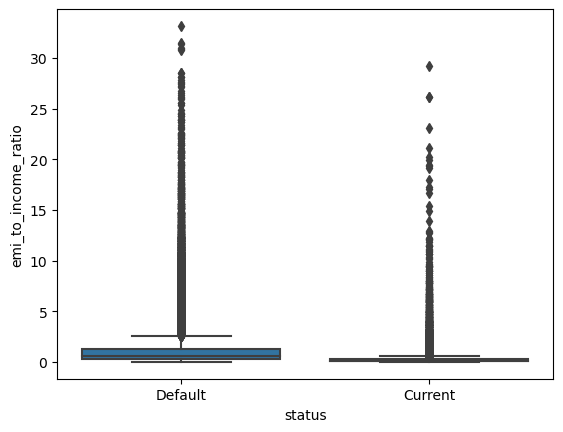

In [29]:
# 2. EMI-to-Income Ratio vs Default
sns.boxplot(data=df, x='status', y='emi_to_income_ratio')

**Insight:**
- Defaulters have significantly higher EMI/Income ratios - strong risk indicator.

<Axes: xlabel='status', ylabel='credit_score'>

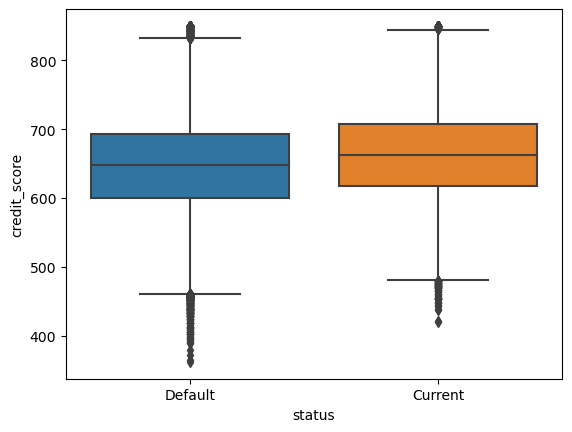

In [30]:
# 3. Credit Score vs Default
sns.boxplot(data=df, x='status', y='credit_score')

In [31]:
# 4. Risk Category vs Default
pd.crosstab(df['risk_category'], df['status'], normalize='index') * 100

status,Current,Default
risk_category,,
High,6.862745,93.137255
Low,16.678495,83.321505
Medium,10.611174,89.388826


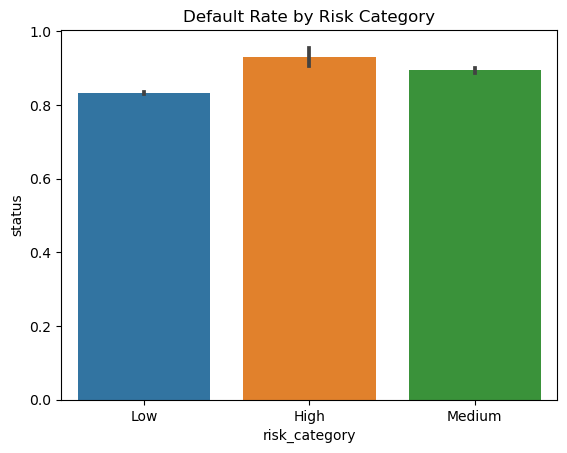

In [32]:
# Plot:
sns.barplot(
    data=df, 
    x='risk_category', 
    y=df['status'].apply(lambda x: 1 if x=='Default' else 0)
)
plt.title("Default Rate by Risk Category")
plt.show()

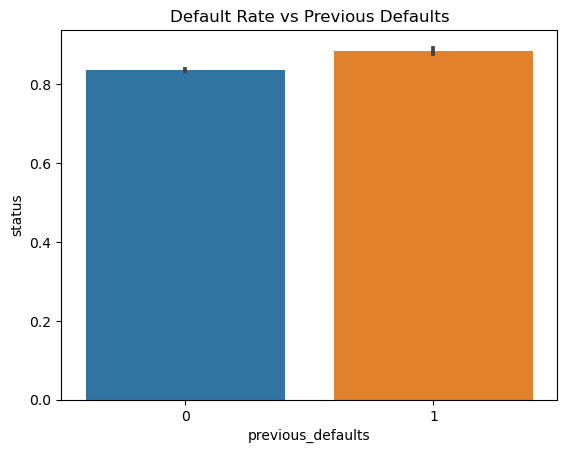

In [33]:
# 5. Previous Defaults vs Default
sns.barplot(
    data=df,
    x='previous_defaults',
    y=df['status'].apply(lambda x: 1 if x=='Default' else 0)
)
plt.title("Default Rate vs Previous Defaults")
plt.show()

#### 3. Outlier Detection 

In [34]:
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)]

In [35]:
# Use IQR for income, credit_score, loan_amount
print(detect_outliers('income').shape)
print(detect_outliers('credit_score').shape)
print(detect_outliers('loan_amount').shape)

(1072, 33)
(753, 33)
(351, 33)


**Insights:**
- Income shows heavy skew with ~10% values marked as outliers, indicating significant variance in borrower earning capacity and potential data irregularities.
- Credit score distribution shows ~7% outliers, many representing extremely low or invalid scores tied to high default behavior.
- ~3.5% of loans fall into outlier ranges, mostly large-ticket loans that significantly influence average portfolio exposure.


Let's NOT remove these - in a fintech setting, outliers are mostly business signals, not errors.